<a href="https://colab.research.google.com/github/CaneHornberger/DS/blob/main/06_pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [2]:

import math
import numpy as np
import pandas as pd
!pip install module_name
from datetime import datetime
from random import randint
import sys
print(sys.path)
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
sys.path.append("/path/to/module/directory")
from module_name import *

from module_name import function_name as alias_name, ClassName as AliasClassName


['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


ImportError: cannot import name 'function_name' from 'module_name' (/usr/local/lib/python3.10/dist-packages/module_name/__init__.py)

---

2. Convert `list` to a pandas series using `pd.Series`

In [3]:
list = [98, 24, 46, 87, 33]
import pandas as pd

my_list = [98, 24, 46, 87, 33]

my_series = pd.Series(my_list)

print(my_series)


0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [4]:
import pandas as pd
my_list = [98, 24, 46, 87, 33]

index_labels = range(2, 2 + len(my_list) * 3, 3)
my_series_with_index = pd.Series(my_list, index=index_labels)

print(my_series_with_index)


2     98
5     24
8     46
11    87
14    33
dtype: int64




```
# This is formatted as code
```

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [5]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Career': ['Engineer', 'Doctor', 'Artist', 'Teacher']
}

df = pd.DataFrame(data)

print(df)


      Name  Age    Career
0    Alice   25  Engineer
1      Bob   30    Doctor
2  Charlie   35    Artist
3    David   40   Teacher


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [6]:
df = df.rename_axis('participant_id')

print(df)

                   Name  Age    Career
participant_id                        
0                 Alice   25  Engineer
1                   Bob   30    Doctor
2               Charlie   35    Artist
3                 David   40   Teacher


6. Use a pandas function to determine the data types of the columns of `df`.

In [7]:
column_types = df.dtypes
print(column_types)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [9]:
name_column = df['Name']
print(name_column)

participant_id
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object


8. Using dot notation, reference column `name`

> Indented block



In [12]:
import pandas as pd

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'career': ['Engineer', 'Doctor', 'Artist', 'Teacher']
}

df = pd.DataFrame(data)

name_column = df.name

print(name_column)


0      Alice
1        Bob
2    Charlie
3      David
Name: name, dtype: object


*8*. Reference column `name` and have it returned in a dataframe.

In [13]:
import pandas as pd

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'career': ['Engineer', 'Doctor', 'Artist', 'Teacher']
}

df = pd.DataFrame(data)

name_df = df[['name']]

print(name_df)


      name
0    Alice
1      Bob
2  Charlie
3    David


9. Show the 3rd element in column `career`.

> Indented block



In [14]:
import pandas as pd

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'career': ['Engineer', 'Doctor', 'Artist', 'Teacher']
}

df = pd.DataFrame(data)

third_element = df.loc[2, 'career']

print(third_element)


Artist


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [15]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()

iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

print(iris.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [19]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()

iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

correlation = iris['sepal length (cm)'].corr(iris['sepal width (cm)'])

print("Correlation between sepal_length and sepal_width:", correlation)


Correlation between sepal_length and sepal_width: -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [20]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()

iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]

correlations = {}
for species in iris_data.target_names:
    subset = iris[iris['species'] == species]
    correlation = subset['sepal length (cm)'].corr(subset['sepal width (cm)'])
    correlations[species] = correlation

max_correlation_species = max(correlations, key=correlations.get)
max_correlation_value = correlations[max_correlation_species]

print("Correlation by species:")
for species, correlation in correlations.items():
    print(f"{species}: {correlation}")

print("\nThe species with the highest correlation:")
print(f"Species: {max_correlation_species}")
print(f"Correlation value: {max_correlation_value}")


Correlation by species:
setosa: 0.7425466856651597
versicolor: 0.5259107172828243
virginica: 0.4572278163941129

The species with the highest correlation:
Species: setosa
Correlation value: 0.7425466856651597


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris_data = load_iris()

# Create a Pandas DataFrame from the iris dataset
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]

# Group by species and calculate the correlation matrix for each group
grouped_by_species = iris.groupby('species')
correlation_by_species = {}

for species, group in grouped_by_species:
    # Exclude the 'species' column from the group
    group_no_species = group.drop('species', axis=1)

    # Calculate the correlation matrix for the group
    correlation_matrix_species = group_no_species.corr()

    # Find the most negatively correlated variables for each species
    most_negatively_correlated_species = correlation_matrix_species.unstack().sort_values().head(1)
    correlation_by_species[species] = most_negatively_correlated_species

# Print the most negatively correlated variables for each species
print("\nMost negatively correlated variables by species:")
for species, correlation_pair in correlation_by_species.items():
    print(f"\nSpecies: {species}")
    print(correlation_pair)



Most negatively correlated variables by species:

Species: setosa
sepal width (cm)  petal length (cm)    0.1777
dtype: float64

Species: versicolor
sepal length (cm)  sepal width (cm)    0.525911
dtype: float64

Species: virginica
sepal length (cm)  petal width (cm)    0.281108
dtype: float64


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


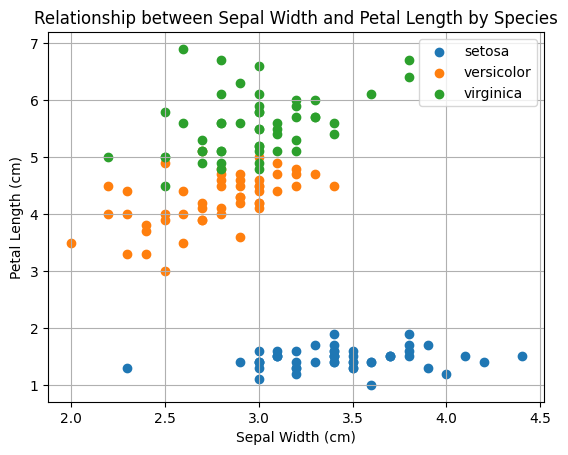

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris_data = load_iris()

# Create a Pandas DataFrame from the iris dataset
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]

# Scatter plot for each species
for species, group in iris.groupby('species'):
    plt.scatter(group['sepal width (cm)'], group['petal length (cm)'], label=species)

# Add labels and legend
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Relationship between Sepal Width and Petal Length by Species')
plt.legend()
plt.grid(True)
plt.show()


This strange relationship where the data reverses when divided into their own categories is called the reversal paradox.